<a href="https://colab.research.google.com/github/Rahulchauhan1612/Zomato-Restaurant-Clustering-Sentiment-Analysis/blob/main/%20Zomato-Restaurant-Clustering-Sentiment-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

ZOMATO IMAGE.avif

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
zomato_df = pd.read_csv("/content/drive/MyDrive/4. Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv")

In [17]:
zomato_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [18]:
zomato_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [19]:
zomato_df.shape

(105, 6)

In [20]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [21]:
zomato_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


### **#Dropping links, name and timing column :**


In [22]:
#dropping unneccesary column:

zomato_df = zomato_df.drop(['Name','Links', 'Timings'],axis = 1)
zomato_df.head()

,Cost,Collections,Cuisines
0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


### **#Dropping Duplicates:**

In [23]:
#dropping duplicates:

zomato_df.drop_duplicates(inplace = True)
zomato_df.shape

(103, 3)

In [24]:
zomato_df.describe()

,Cost,Collections,Cuisines
count,103,51,103
unique,29,42,92
top,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese"
freq,12,4,3


### **#Handling cost column:**

In [26]:
zomato_df["Cost"].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [27]:
#creating function named handlecost:

def handlecost(value):
  value = str(value)
  if ',' in value:
      value = value.replace(',', '')
      return float(value)
  else:
      return float(value)
    
zomato_df['Cost'] = zomato_df['Cost'].apply(handlecost)
zomato_df['Cost'].unique()

array([ 800., 1300., 1200., 1500.,  500.,  300., 1000.,  350.,  400.,
       1600.,  750.,  550., 1900.,  450.,  150., 1400., 1100.,  600.,
        200.,  900.,  700., 1700., 2500.,  850.,  650., 1800., 2800.,
       1750.,  250.])

### **#Handeling nan values in collection column:**

In [28]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cost         103 non-null    float64
 1   Collections  51 non-null     object 
 2   Cuisines     103 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [29]:
# replacing nan values:

zomato_df['Collections'] = zomato_df['Collections'].replace(np.nan , "Unknown", regex=True)

In [30]:
zomato_df.tail()

,Cost,Collections,Cuisines
99,1000.0,Unknown,"Chinese, Seafood"
100,600.0,Unknown,"Fast Food, Salad"
101,200.0,Unknown,"Bakery, Mithai"
103,250.0,Unknown,Fast Food
104,1700.0,Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian"


In [31]:
#droppig na if any:

zomato_df = zomato_df.dropna(how = 'any')

In [32]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cost         103 non-null    float64
 1   Collections  103 non-null    object 
 2   Cuisines     103 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


### **#Imputing log10 on cost column:**

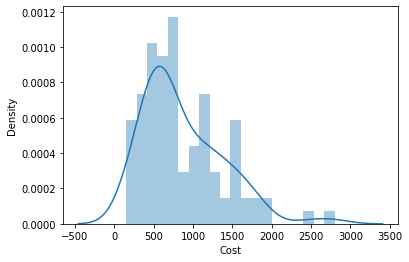

In [36]:
sns.distplot(zomato_df['Cost'],bins=20)

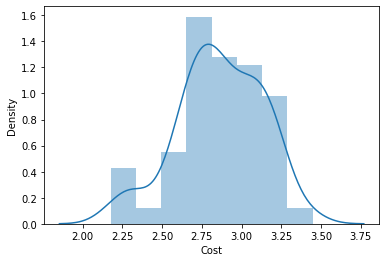

In [37]:
#Imputing log10 on cost column:

sns.distplot(np.log10(zomato_df['Cost']))

### **#Checking and imputing outliers:**

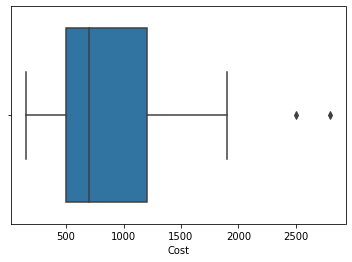

In [38]:
sns.boxplot(zomato_df['Cost'])

In [39]:
#imputing outliers using iqr:

def remove_outlier_using_IQR(zomato_df):
    Q1=zomato_df.quantile(0.25)
    Q3=zomato_df.quantile(0.75)
    IQR=Q3-Q1
    zomato_df_final_output = zomato_df[~((zomato_df<(Q1-1.5*IQR)) | (zomato_df>(Q3+1.5*IQR)))]
    return zomato_df_final_output

In [40]:
zomato_df["Cost"] = remove_outlier_using_IQR(zomato_df["Cost"])

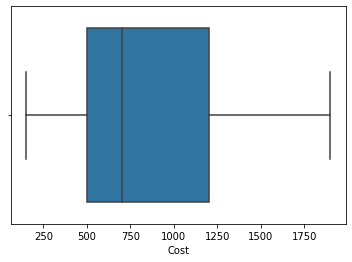

In [41]:
sns.boxplot(zomato_df['Cost'])

### **#Top 5 Cuisines:**

In [42]:
#Top 5 Cuisines:

Cuisines_df = zomato_df['Cuisines'].value_counts().reset_index()
Cuisines_df.head()

,index,Cuisines
0,"North Indian, Chinese",3
1,North Indian,3
2,Fast Food,2
3,"Biryani, North Indian, Chinese",2
4,"South Indian, North Indian, Chinese",2


In [43]:
Cuisines_df.rename(columns={'index': 'Cuisines_name'}, inplace=True)
Cuisines_df.rename(columns={'Cuisines': 'Count'}, inplace=True)
Cuisines_df.head()

,Cuisines_name,Count
0,"North Indian, Chinese",3
1,North Indian,3
2,Fast Food,2
3,"Biryani, North Indian, Chinese",2
4,"South Indian, North Indian, Chinese",2


In [44]:
Cuisines_df.tail()

,Cuisines_name,Count
87,"Biryani, South Indian, North Indian, Chinese, ...",1
88,"Italian, North Indian, South Indian, Asian",1
89,"North Indian, Fast Food",1
90,"Arabian, North Indian, Chinese",1
91,"Thai, Asian, Chinese, Malaysian",1


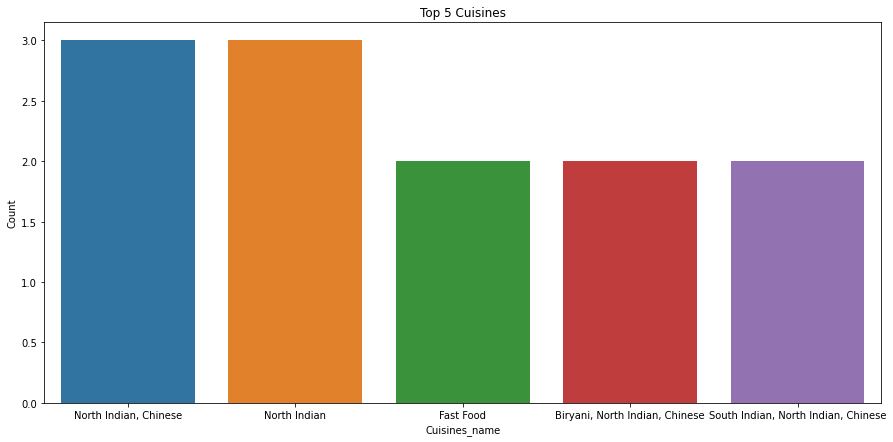

In [46]:
#Top 5 cuisines barplot, Count Vs Cuisins name:
plt.figure(figsize=(15,7))
plt.title('Top 5 Cuisines')
sns.barplot(x='Cuisines_name',y='Count',data=Cuisines_df[:5])

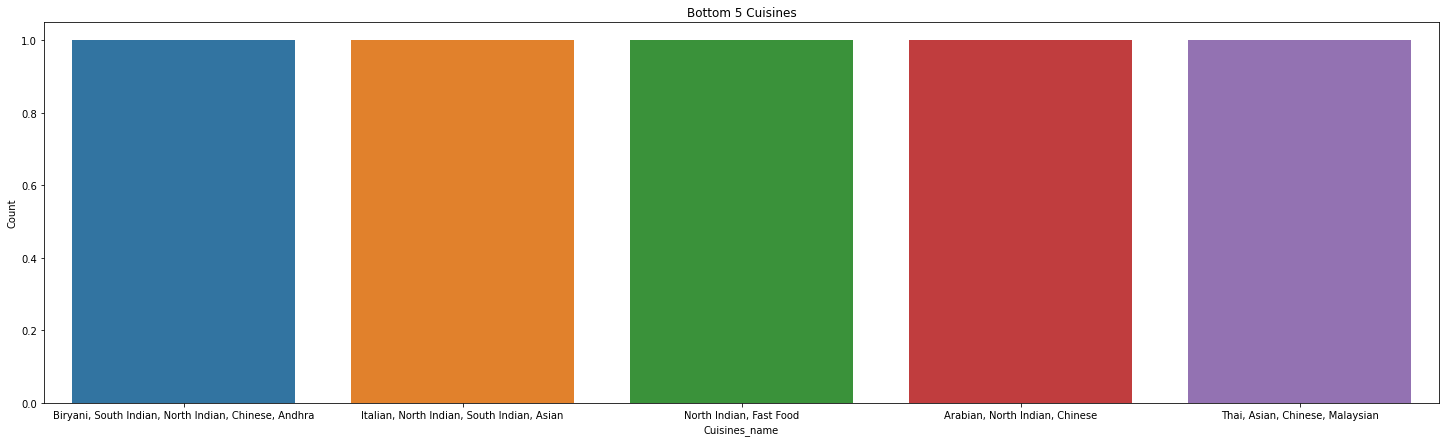

In [49]:
#Bottom 5 cuisines barplot, Count Vs Cuisins name:
plt.figure(figsize=(25,7))
plt.title('Bottom 5 Cuisines')
sns.barplot(x='Cuisines_name',y='Count',data=Cuisines_df[-5:])

### **#Top 5 Collections:**

In [50]:
zomato_df['Collections'] = zomato_df['Collections'].str.replace('\d+', '')

In [52]:
#Top 5 Collections:
Collections_df = zomato_df['Collections'].value_counts().reset_index()
Collections_df.rename(columns={'index': 'Collections_name'}, inplace=True)
Collections_df.rename(columns={'Collections': 'Count'}, inplace=True)
Collections_df.head()

,Collections_name,Count
0,Unknown,52
1,Food Hygiene Rated Restaurants in Hyderabad,4
2,Great Buffets,2
3,New on Gold,2
4,Hyderabad's Hottest,2


In [53]:
Collections_df.tail()

,Collections_name,Count
38,"Live Sports Screenings, Gigs and Events",1
39,"Rooftops, Live Sports Screenings, Best Bars & ...",1
40,"Barbecue & Grill, Live Sports Screenings",1
41,"Mandi, Great Buffets, The ‘Must Visit’ Eateries",1
42,Sunday Brunches,1


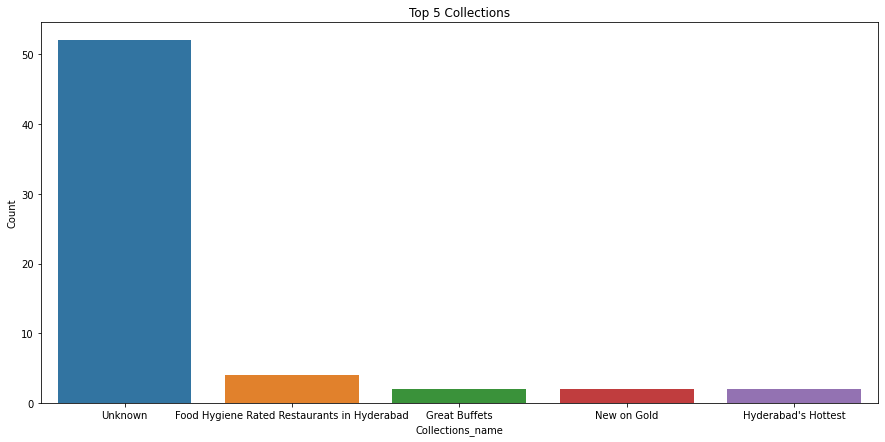

In [55]:
#Top 5 Collections barplot, Count Vs Collections name:
plt.figure(figsize=(15,7))
plt.title('Top 5 Collections')
sns.barplot(x='Collections_name',y='Count',data=Collections_df[:5])

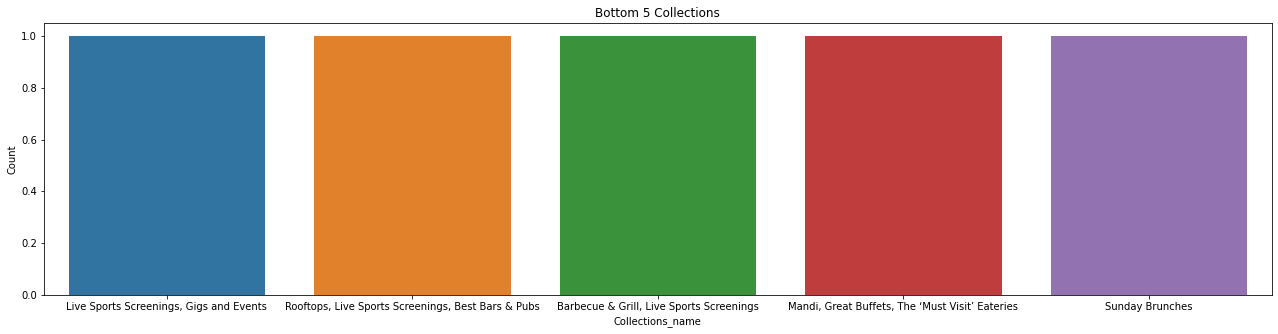

In [62]:
#Bottom 5 Collections barplot, Count Vs Collections name:
plt.figure(figsize=(22,5))
plt.title('Bottom 5 Collections')
sns.barplot(x='Collections_name',y='Count',data=Collections_df[-5:])

In [63]:
zomato_df[zomato_df['Collections']=='Food Hygiene Rated Restaurants in Hyderabad']

,Cost,Collections,Cuisines
6,500.0,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South..."
67,1200.0,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Hyderabadi"
87,600.0,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger"
96,600.0,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai"


In [64]:
Collections_df.iloc[0]

Collections_name    Unknown
Count                    52
Name: 0, dtype: object

### **#Data preprocessing:**

In [65]:
from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

### **#Removing punctuation:**

In [68]:

#remove punctuation:

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [69]:
zomato_df['Collections'] = zomato_df['Collections'].apply(remove_punctuation)
zomato_df.head()

,Cost,Collections,Cuisines
0,800.0,Food Hygiene Rated Restaurants in Hyderabad Co...,"Chinese, Continental, Kebab, European, South I..."
1,800.0,Hyderabads Hottest,"Biryani, North Indian, Chinese"
2,1300.0,Great Buffets Hyderabads Hottest,"Asian, Mediterranean, North Indian, Desserts"
3,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,1200.0,Best Bars Pubs Food Hygiene Rated Restaurants...,"Asian, Continental, North Indian, Chinese, Med..."


### **#Removing stopwards:**